## Assignment 0: Preparing the environment

### Loading MNIST database with Keras using Tensorflow:

In [1]:
%pylab inline

# input image dimensions
img_rows, img_cols = 28, 28
#
# # Uncomment the following lines if you have keras installed. Otherwise you can 
# # use the file I uploaded: mnist.npz
import keras
from keras.datasets import mnist
from keras import backend as K
#
#
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols)
    input_shape = (img_rows, img_cols)
#
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

np.savez_compressed('mnist.npz', x_train, y_train, x_test, y_test)

#arc = load('mnist.npz')

#x_train = arc['arr_0']
#y_train = arc['arr_1']
#x_test  = arc['arr_2']
#y_test  = arc['arr_3']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Plotting image from x_train:

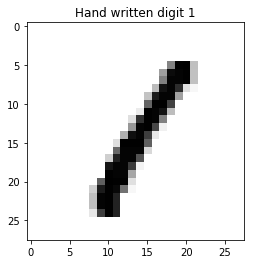

In [2]:
#import matplotlib.pyplot as plot
#import math

# Show image number 3, and write in the title what digit it should correspond to
N=3
imshow(x_train[N], cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))

### Plotting image from x_test:

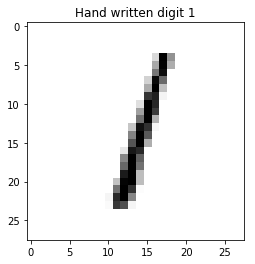

In [3]:
N=2
imshow(x_test[N], cmap='gray_r')
#colorbar()
_ = title('Hand written digit '+str(y_test[N]))

### My laptop configuration:

In [4]:
#import os
#os.system("lspcu")
!lscpu
##!lshw -class cpu

Architecture:          x86_64
CPU op-mode(s):        32-bit, 64-bit
Byte Order:            Little Endian
CPU(s):                4
On-line CPU(s) list:   0-3
Thread(s) per core:    2
Core(s) per socket:    2
Socket(s):             1
NUMA node(s):          1
Vendor ID:             GenuineIntel
CPU family:            6
Model:                 42
Model name:            Intel(R) Core(TM) i5-2450M CPU @ 2.50GHz
Stepping:              7
CPU MHz:               2979.713
CPU max MHz:           3100.0000
CPU min MHz:           800.0000
BogoMIPS:              4988.73
Virtualization:        VT-x
L1d cache:             32K
L1i cache:             32K
L2 cache:              256K
L3 cache:              3072K
NUMA node0 CPU(s):     0-3
Flags:                 fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx rdtscp lm constant_tsc arch_perfmon pebs bts nopl xtopology nonstop_tsc cpuid aperfmperf pni pclmulqdq dtes64 monitor d

In [5]:
!lshw -class memory

  *-memory                
       description: System memory
       physical id: 0
       size: 15GiB


## Assignment 1

### Defining distance functions:

In [6]:
##Assignment 1
#Functions:

#Naive
def d_infty(x,z):
    dist0 = 0
    for i in range(28):
        for j in range(28):
            temp = abs(z[i,j]-x[i,j])
            if temp > dist0:
                dist0 = temp
    return dist0
def d_one(x,z):
    dist1 = 0
    for i in range(28):
        for j in range(28):
            temp = z[i,j]-x[i,j]
            dist1 += abs(temp)
    return dist1
def d_two(x,z):
    dist2 = 0
    for i in range(28):
        for j in range(28):
            temp = z[i,j]-x[i,j]
            dist2 += temp*temp
    return math.sqrt(dist2)

#Optimized
def opt_d_infty(x,z):
    xx = np.array(x)
    zz = np.array(z)
    dd = abs(np.subtract(xx,zz))
    return dd.max()
def opt_d_one(x,z):
    xx = np.array(x)
    zz = np.array(z)
    dd = abs(np.subtract(xx,zz))
    return np.sum(dd)
def opt_d_two(x,z):
    xx = np.array(x)
    zz = np.array(z)
    dd = abs(np.subtract(xx,zz))
    dd2 = dd*dd
    return np.sqrt(np.sum(dd2))

### Testing and timing functions:

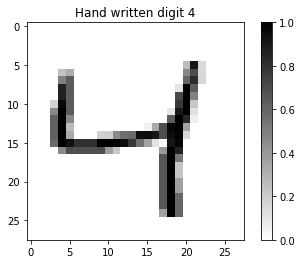

In [7]:
#### Using x_train[N=2] AND x_test[N=2] for testing and timing

N=2
imshow(x_train[N], cmap='gray_r')
colorbar()
_ = title('Hand written digit '+str(y_train[N]))

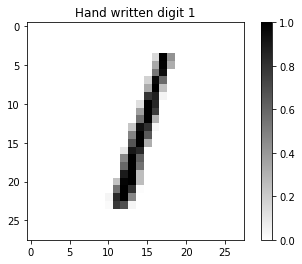

In [8]:
imshow(x_test[N], cmap='gray_r')
colorbar()
_ = title('Hand written digit '+str(y_test[N]))

In [11]:
print("Checking and Timing d_infty():\n")
print ("Naïve distance x_train[2] to itself:",
       d_infty(x_train[2],x_train[2]))
%timeit d_infty(x_train[2],x_train[2])
print ("\n")
print ("Naïve distance x_train[2] to x_test[2]:",
       d_infty(x_train[2],x_test[2]))
%timeit d_infty(x_train[2],x_test[2])
print ("\n")
print ("Opt. distance x_train[2] to itself:",
       opt_d_infty(x_train[2],x_train[2]))
%timeit opt_d_infty(x_train[2],x_train[2])
print ("\n")
print ("Opt. distance x_train[2] to x_test[2]:", 
       opt_d_infty(x_train[2],x_test[2]))
%timeit opt_d_infty(x_train[2],x_test[2])

Checking and Timing d_infty():

Naïve distance x_train[2] to itself: 0
2.76 ms ± 27.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Naïve distance x_train[2] to x_test[2]: 1.0
806 µs ± 2.14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Opt. distance x_train[2] to itself: 0.0
15.8 µs ± 541 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Opt. distance x_train[2] to x_test[2]: 1.0
16.8 µs ± 809 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
print("Checking and Timing d_one():\n")
print ("Naïve distance x_train[2] to itself:",
       d_one(x_train[2],x_train[2]))
%timeit d_one(x_train[2],x_train[2])
print ("\n")
naive = d_one(x_train[2],x_test[2])
print ("Naïve distance x_train[2] to x_test[2]:",naive)
%timeit d_one(x_train[2],x_test[2])
print ("\n")
print ("Opt. distance x_train[2] to itself:",
       opt_d_one(x_train[2],x_train[2]))
%timeit opt_d_one(x_train[2],x_train[2])
print ("\n")
opt = opt_d_one(x_train[2],x_test[2])
print ("Opt. distance x_train[2] to x_test[2]:", opt)
%timeit opt_d_one(x_train[2],x_test[2])
error_one = (abs(naive-opt)/naive)*100
trunc_error_one = '%.3e'%(error_one)
print ("\nError (due to numpy float32 standart): ",
       trunc_error_one, "%")

Checking and Timing d_one():

Naïve distance x_train[2] to itself: 0.0
629 µs ± 36.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Naïve distance x_train[2] to x_test[2]: 107.5294131655246
591 µs ± 1.46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Opt. distance x_train[2] to itself: 0.0
20.6 µs ± 2.1 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Opt. distance x_train[2] to x_test[2]: 107.52942
20.3 µs ± 1.89 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Error (due to numpy float32 standart):  5.375e-06 %


In [13]:
print("Checking and Timing d_one():\n")
print ("Naïve distance x_train[2] to itself:", d_two(x_train[2],x_train[2]))
%timeit d_two(x_train[2],x_train[2])
print ("\n")
naive2 = d_two(x_train[2],x_test[2])
print ("Naïve distance x_train[2] to x_test[2]:",naive2)
%timeit d_two(x_train[2],x_test[2])
print ("\n")
print ("Opt. distance x_train[2] to itself:",opt_d_two(x_train[2],x_train[2]))
%timeit opt_d_two(x_train[2],x_train[2])
print ("\n")
opt2 = opt_d_two(x_train[2],x_test[2])
print ("Opt. distance x_train[2] to x_test[2]:", opt2)
%timeit opt_d_two(x_train[2],x_test[2])
error_two = (abs(naive2-opt2)/naive2)*100
trunc_error_two = '%.3e'%(error_two)
print ("\nError (due to numpy float32 standart): ",trunc_error_two, "%")

Checking and Timing d_one():

Naïve distance x_train[2] to itself: 0.0
612 µs ± 20.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Naïve distance x_train[2] to x_test[2]: 9.153183211210528
593 µs ± 9.61 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Opt. distance x_train[2] to itself: 0.0
24.9 µs ± 1.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Opt. distance x_train[2] to x_test[2]: 9.153183
23.3 µs ± 137 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Error (due to numpy float32 standart):  2.489e-06 %


### Assignment 2

In [14]:
#Assignment 2
#import numpy as np

def func_dist(N,d,x,z):
##function input: Number of first entries of x and z, distance type d, array z and array z
    D = np.zeros((N,N)) 
    for i in range(N):
        for j in range(i+1):
            #print(j,i)
            D[i,j] = d(x[i],z[j])
            if i!=j: D[j,i]=D[i,j]
    return D

In [15]:
func_dist(4, opt_d_one, x_train, x_test)
#generating a 4x4 matrix using dist = opt_d_one and arrays x_train and x_test

array([[113.46274567, 135.50196838, 116.37255096, 120.21568298],
       [135.50196838, 161.79216003, 166.45098877, 140.35687256],
       [116.37255096, 166.45098877, 107.52941895,  56.27450943],
       [120.21568298, 140.35687256,  56.27450943, 169.66667175]])

In [16]:
D4 = func_dist(4, d_infty, x_train, x_train)
D4opt = func_dist(4, opt_d_infty, x_train, x_train)
print('Comparing matrices 4x4 with d_infty distances:\n')
print(D4)
print(D4opt)

Comparing matrices 4x4 with d_infty distances:

[[0.         1.         1.         0.99215686]
 [1.         0.         1.         1.        ]
 [1.         1.         0.         1.        ]
 [0.99215686 1.         1.         0.        ]]
[[0.         1.         1.         0.99215686]
 [1.         0.         1.         1.        ]
 [1.         1.         0.         1.        ]
 [0.99215686 1.         1.         0.        ]]


In [17]:
D4one = func_dist(4, d_one, x_train, x_train)
D4optone = func_dist(4, opt_d_one, x_train, x_train)
print('Comparing matrices 4x4 with d_one distances:\n')
print(D4one)
print(D4optone)

Comparing matrices 4x4 with d_one distances:

[[  0.         115.70980474 148.5019625  122.61176573]
 [115.70980474   0.         160.91764866 141.45882461]
 [148.5019625  160.91764866   0.         125.60784444]
 [122.61176573 141.45882461 125.60784444   0.        ]]
[[  0.         115.70979309 148.50196838 122.61177063]
 [115.70979309   0.         160.91764832 141.45881653]
 [148.50196838 160.91764832   0.         125.60784149]
 [122.61177063 141.45881653 125.60784149   0.        ]]


In [18]:
D4two = func_dist(4, d_two, x_train, x_train)
D4opttwo = func_dist(4, opt_d_two, x_train, x_train)
print('Comparing matrices 4x4 with d_two distances:\n')
print(D4two)
print(D4opttwo)

Comparing matrices 4x4 with d_two distances:

[[ 0.          9.36122219 10.87509466 10.01890107]
 [ 9.36122219  0.         11.36836442 10.84912295]
 [10.87509466 11.36836442  0.         10.08471315]
 [10.01890107 10.84912295 10.08471315  0.        ]]
[[ 0.          9.36122227 10.87509441 10.01890182]
 [ 9.36122227  0.         11.36836433 10.849123  ]
 [10.87509441 11.36836433  0.         10.08471394]
 [10.01890182 10.849123   10.08471394  0.        ]]


In [19]:
print('Timing func_dist with "opt_d" distances for matrix size N = 1000:\n')

%timeit func_dist(1000,opt_d_infty,x_train,x_train)
%timeit func_dist(1000,opt_d_one,x_train,x_train)
%timeit func_dist(1000,opt_d_two,x_train,x_train)

Timing func_dist with "opt_d" distances for matrix size N = 1000:

8.73 s ± 55.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.2 s ± 638 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
14.3 s ± 1.15 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Assignment 3

- From here forth, only the opt_d distances will be used.
- The matrix plots are colored and has colorbars, making it easier to perceive the different scales.

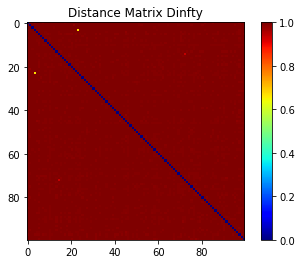

In [20]:
#Assingment 3
#printing image matrices
N = 100
Dinfty = func_dist(N,opt_d_infty,x_train,x_train)
imshow(Dinfty, cmap='jet')
colorbar()
_ = title('Distance Matrix Dinfty')

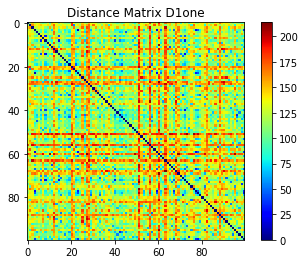

In [21]:
N = 100 
D1one = func_dist(N,opt_d_one,x_train,x_train)
imshow(D1one, cmap='jet')
colorbar()
_ = title('Distance Matrix D1one')

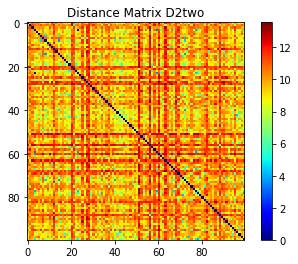

In [22]:
N = 100 
D2two = func_dist(N,opt_d_two,x_train,x_train)
imshow(D2two, cmap='jet')
colorbar()
_ = title('Distance Matrix D2two')

### Assignment 4
- Efficency function by counting the number of failures of the **leave one out** strategy.
- It is import to point out that the efficency function evaluates an error, therefore the result occurs at its minimum value.

In [23]:
##Assignment 4

def efficency(D,N,Y):
##function input: Distance matrix, number of first N samples, array of the labels y_train

    error_counter = 0
    for i in range(N):
        D[i,i]=D[i,N-1] ##shifting the last column element to the equal indices position
    for i in range(N-1):
        A = np.array(D[i])
        a_val = A.min()
        a = A.argmin()
        if Y[a]!=Y[i]:
            error_counter += 1
  
    return error_counter/N
            

In [24]:
print ('Timing efficency function for Dinfty, N = {100,200,400,800,1600}, y_train:')
Dinfty = func_dist(100,opt_d_infty,x_train,x_train)
%timeit efficency(Dinfty, 100, y_train)

Dinfty = func_dist(200,opt_d_infty,x_train,x_train)
%timeit efficency(Dinfty, 200, y_train)

Dinfty = func_dist(400,opt_d_infty,x_train,x_train)
%timeit efficency(Dinfty, 400, y_train)

Dinfty = func_dist(800,opt_d_infty,x_train,x_train)
%timeit efficency(Dinfty, 800, y_train)

Dinfty = func_dist(1600,opt_d_infty,x_train,x_train)
%timeit efficency(Dinfty, 1600, y_train)

Timing efficency function for Dinfty, N = {100,200,400,800,1600}, y_train:
833 µs ± 4.02 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.88 ms ± 72 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.88 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.54 ms ± 9.84 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
20.4 ms ± 1.39 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
print ('Timing efficency function for D1, N = {100,200,400,800,1600}, y_train:')
D1 = func_dist(100,opt_d_one,x_train,x_train)
%timeit efficency(D1, 100, y_train)

D1 = func_dist(200,opt_d_one,x_train,x_train)
%timeit efficency(D1, 200, y_train)

D1 = func_dist(400,opt_d_one,x_train,x_train)
%timeit efficency(D1, 400, y_train)

D1 = func_dist(800,opt_d_one,x_train,x_train)
%timeit efficency(D1, 800, y_train)

D1 = func_dist(1600,opt_d_one,x_train,x_train)
%timeit efficency(D1, 1600, y_train)

Timing efficency function for D1, N = {100,200,400,800,1600}, y_train:
1.01 ms ± 69.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.14 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.32 ms ± 996 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.8 ms ± 1.39 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
26.7 ms ± 3.5 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
print ('Timing efficency function for D2, N = {100,200,400,800,1600}, y_train:')
D2 = func_dist(100,opt_d_two,x_train,x_train)
%timeit efficency(D2, 100, y_train)

D2 = func_dist(200,opt_d_two,x_train,x_train)
%timeit efficency(D2, 200, y_train)

D2 = func_dist(400,opt_d_two,x_train,x_train)
%timeit efficency(D2, 400, y_train)

D2 = func_dist(800,opt_d_two,x_train,x_train)
%timeit efficency(D2, 800, y_train)

D2 = func_dist(1600,opt_d_two,x_train,x_train)
%timeit efficency(D2, 1600, y_train)

Timing efficency function for D2, N = {100,200,400,800,1600}, y_train:
827 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.81 ms ± 5.55 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.8 ms ± 7.43 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.51 ms ± 29.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
20.1 ms ± 687 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Assignment 5

In [27]:
#Assignment 5

E = np.zeros(15)
K = np.array([100, 200, 400, 800, 1600])
i = 0

for k in K:
    D0 = func_dist(k,opt_d_infty,x_train,x_train)
    E[0+i] = efficency(D0, k, y_train)
    D1 = func_dist(k,opt_d_one,x_train,x_train)
    E[1+i] = efficency(D1, k, y_train)
    D2 = func_dist(k,opt_d_two,x_train,x_train)
    E[2+i] = efficency(D2, k, y_train)
    i+=3
    
EE = E.reshape(5,3)
print(EE)

[[0.57    0.16    0.16   ]
 [0.515   0.145   0.135  ]
 [0.4375  0.15    0.135  ]
 [0.4     0.145   0.12875]
 [0.36875 0.1025  0.09375]]


[0.57, 0.515, 0.4375, 0.4, 0.36875]
[0.16, 0.145, 0.15, 0.145, 0.1025]
[0.16, 0.135, 0.135, 0.12875, 0.09375]


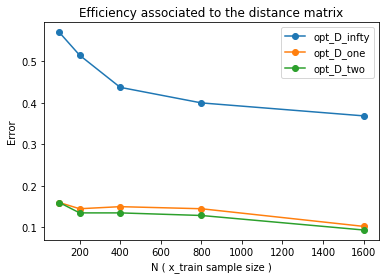

In [28]:
y_infty=[E[0+l] for l in range(0,15,3)]
y_one = [E[1+l] for l in range(0,15,3)]
y_two = [E[2+l] for l in range(0,15,3)]
print(y_infty)
print(y_one)
print(y_two)

import matplotlib.pyplot as plt
plt.plot(K, y_infty, '-o')
plt.plot(K, y_one, '-o')
plt.plot(K, y_two, '-o')
#plt.xticks(K)
plt.legend(('opt_D_infty','opt_D_one','opt_D_two'))  
plt.title('Efficiency associated to the distance matrix')
plt.ylabel('Error')
plt.xlabel('N ( x_train sample size )')
plt.show()

### Assignment 8 (Part 1)

In [29]:
import sklearn.neighbors as sklN

In [30]:
N=100
print('Comparing BallTree with op_d distance against intrinsic sklN metrics (for N=100):\n')
print('Distance op_d_infty and chebyshev metric:')
%timeit sklN.BallTree(x_train[:N].reshape(N,28*28),metric=opt_d_infty)
%timeit sklN.BallTree(x_train[:N].reshape(N,28*28),metric='chebyshev')
print('\nDistance op_d_one and manhattan metric:')
%timeit sklN.BallTree(x_train[:N].reshape(N,28*28),metric=opt_d_one)
%timeit sklN.BallTree(x_train[:N].reshape(N,28*28),metric='manhattan')
print('\nDistance op_d_two and euclidean metric:')
%timeit sklN.BallTree(x_train[:N].reshape(N,28*28),metric=opt_d_two)
%timeit sklN.BallTree(x_train[:N].reshape(N,28*28),metric='euclidean')

#tree = sklN.BallTree(x_train[:N].reshape(N,28*28),metric='euclidean')
#val, idx = tree.query(x_test[:N].reshape(N,28*28), k=2)
#print(k)
#print(val)

Comparing BallTree with op_d distance against intrinsic sklN metrics (for N=100):

Distance op_d_infty and chebyshev metric:
3.98 ms ± 349 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
534 µs ± 3.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Distance op_d_one and manhattan metric:
4.18 ms ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
484 µs ± 4.05 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Distance op_d_two and euclidean metric:
5.45 ms ± 45.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
482 µs ± 832 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
#function that tests the efficiency on all the entries of the test set x_test:
def efficency_on_test(N,Metric):
    tree = sklN.BallTree(x_train[:N].reshape(N,28*28),metric=Metric)
    val, idx = tree.query(x_test[:10000].reshape(10000,28*28),k=1)
    #print(idx)
    error_counter=0
    for i in range(10000):
        if y_train[idx[i]]!=y_test[i]: error_counter+=1
#print(i, idx[i], y_train[idx[i]])
#print(i, y_test[i])
    return (N, error_counter/len(x_test))   

In [32]:
NN=[100,200,300,400,500]
list_eff2=[efficency_on_test(n,'euclidean') for n in NN]
#list_opt2=[efficency_on_test(n, opt_d_two) for n in NN]
list_eff1=[efficency_on_test(n,'manhattan') for n in NN]
#list_opt1=[efficency_on_test(n, opt_d_one) for n in NN]
list_eff0=[efficency_on_test(n,'chebyshev') for n in NN]
#list_opt0=[efficency_on_test(n, opt_d_infty) for n in NN]

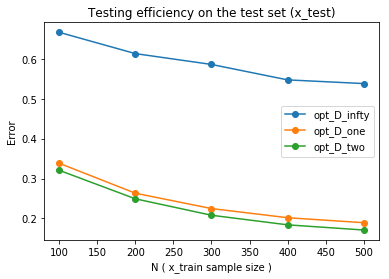

In [33]:
#print(list_eff)
y_eff0 = [l[1] for l in list_eff0]
y_eff1 = [l[1] for l in list_eff1]
y_eff2 = [l[1] for l in list_eff2]
#y_opt0 = [l[1] for l in list_opt0]
#y_opt1 = [l[1] for l in list_opt1]
#y_opt2 = [l[1] for l in list_opt2]
#print(NN)
#print(y_eff)
#import matplotlib.pyplot as plt
plt.plot(NN,y_eff0, '-o')
plt.plot(NN,y_eff1, '-o')
plt.plot(NN,y_eff2, '-o')
#plt.plot(NN,y_opt0, '-o')
#plt.plot(NN,y_opt1, '-o')
#plt.plot(NN,y_opt2, '-o')
plt.legend(('opt_D_infty','opt_D_one','opt_D_two'),
           loc = 'center right' )    
plt.title('Testing efficiency on the test set (x_test)')
plt.ylabel('Error')
plt.xlabel('N ( x_train sample size )')
plt.show()

In [37]:
NNN=[3200, 6400, 12800, 25600, 51200]
list_eff22=[efficency_on_test(n,'euclidean') for n in NNN]
list_eff11=[efficency_on_test(n,'manhattan') for n in NNN]
list_eff00=[efficency_on_test(n,'chebyshev') for n in NNN]

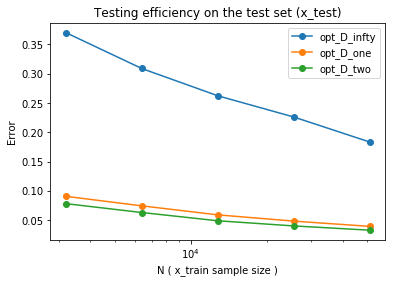

[(3200, 0.0783), (6400, 0.0631), (12800, 0.049), (25600, 0.0402), (51200, 0.0329)]


In [43]:
y_eff00 = [l[1] for l in list_eff00]
y_eff11 = [l[1] for l in list_eff11]
y_eff22 = [l[1] for l in list_eff22]

plt.xscale('log')
plt.plot(NNN, y_eff00, '-o')
plt.plot(NNN, y_eff11, '-o')
plt.plot(NNN, y_eff22, '-o')

plt.legend(('opt_D_infty','opt_D_one','opt_D_two'),
           loc = 'upper right' )    
plt.title('Testing efficiency on the test set (x_test)')
plt.ylabel('Error')
plt.xlabel('N ( x_train sample size )')
plt.show()
print(list_eff22)
#x_eff2 = [l[0] for l in list_eff2]
#y_eff2 = [l[1] for l in list_eff2]
#print(x_eff2)
#print(y_eff2)

#import matplotlib.pyplot as plt
#plot.xscale('log')
#plot.plot(x_eff2,y_eff2)
#plot.plot(x_eff2,y_eff2, 'or')
#plot.show()

### Assignment 6